Dataset preview:
    dosage_mg  recovery_rate
0       0.00          15.49
1       1.01          15.38
2       2.01          19.52
3       3.02          23.91
4       4.02          20.37
✅ Pickle files saved in: C:\Users\dell\Desktop\medicine_recovery

📊 POLYNOMIAL REGRESSION METRICS
MAE  : 2.73
MSE  : 12.06
RMSE : 3.47
R2   : 0.98

Dosage 100 mg is SAFE – Optimal Range


C:\Users\dell\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


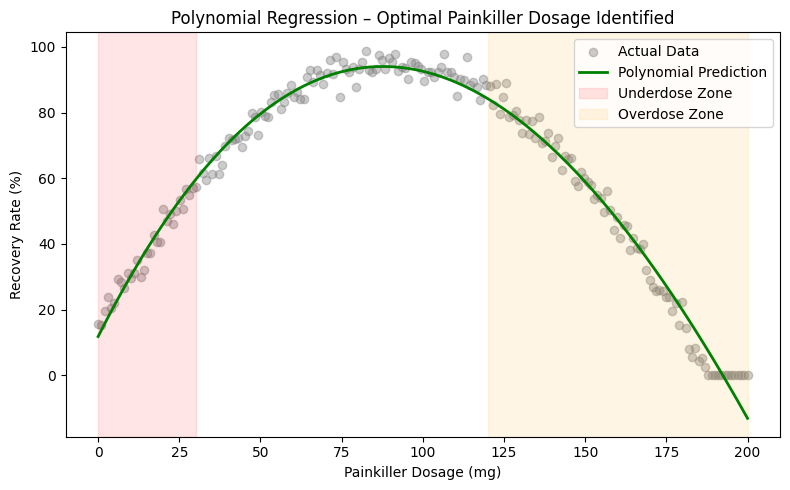

In [9]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


try:
    current_dir = os.path.dirname(os.path.abspath(__file__))  # works in .py files
except NameError:
    current_dir = os.getcwd()  # fallback for Jupyter notebooks

csv_path = os.path.join(current_dir, "medicine_recovery_dataset.csv")


df = pd.read_csv(csv_path)
print("Dataset preview:\n", df.head())

X = df[['dosage_mg']]
y = df['recovery_rate']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)


with open(os.path.join(current_dir, "poly_transform.pkl"), "wb") as f:
    pickle.dump(poly, f)

with open(os.path.join(current_dir, "model.pkl"), "wb") as f:
    pickle.dump(poly_model, f)

print("✅ Pickle files saved in:", current_dir)


y_pred = poly_model.predict(X_test_poly)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\n📊 POLYNOMIAL REGRESSION METRICS")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R2   : {r2:.2f}")


def dosage_threshold(dosage):
    if dosage < 30:
        return "UNDERDOSE – Ineffective"
    elif dosage > 120:
        return "OVERDOSE – Side Effects Risk"
    else:
        return "SAFE – Optimal Range"

# Example usage
example_dosage = 100
print(f"\nDosage {example_dosage} mg is {dosage_threshold(example_dosage)}")

dosage_range = np.linspace(0, 200, 300).reshape(-1, 1)
dosage_range_poly = poly.transform(dosage_range)
recovery_curve = poly_model.predict(dosage_range_poly)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color="gray", alpha=0.4, label="Actual Data")
plt.plot(dosage_range, recovery_curve, color="green", linewidth=2, label="Polynomial Prediction")
plt.axvspan(0, 30, color='red', alpha=0.1, label="Underdose Zone")
plt.axvspan(120, 200, color='orange', alpha=0.1, label="Overdose Zone")
plt.xlabel("Painkiller Dosage (mg)")
plt.ylabel("Recovery Rate (%)")
plt.title("Polynomial Regression – Optimal Painkiller Dosage Identified")
plt.legend()
plt.tight_layout()
plt.show()
